# Exploratory Data Analysis (EDA)

## Importing Libraries

Let's import some libraries for visualisation and feature selection.

In [187]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import nltk
import re
import string
import random
import contractions

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
# Set the maximum number of columns to display
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_columns", 100)

## Import Data

We'll import the cleaned exported data instead of the raw data since we have saved it previously.

In [3]:
# Read the data into df
df = pd.read_csv("D:/Documents/Data Science Learning/My Project/Recruitment Scam/02-data/recruitment_cleaned.csv")

# Take a look at the first 10 rows of the dataset
df.head(10)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,state
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,NaN,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,N
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,NaN,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",<p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...,"<p><b>JOB TITLE:</b> Itemization Review Manager</p>\r\n<p><b>LOCATION:</b> Fort Worth, TX<b> ...",<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>RN license in the State of Texas</li>\r\n<li>Diplom...,<p>Full Benefits Offered</p>,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US,FL
5,Accounting Clerk,"US, MD,",NaN,<p><b>Job Overview</b></p>\r\n<p>Apex is an environmental consulting firm that offers stable lea...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Administrative,0,0,US,MD
6,Head of Content (m/f),"DE, BE, Berlin","<p>Founded in 2009, the <b>Fonpit AG</b> rose with its international web portal <b>ANDROIDPIT</b...",<p><b>Your Responsibilities:</b></p>\r\n<p> </p>\r\n<ul>\r\n<li>Manage the English-speaking edit...,<p><b>Your Know-How:</b></p>\r\n<p><b> ...,<p><b>Your Benefits:</b></p>\r\n<p> </p>\r\n<ul>\r\n<li>Being part of a fast-growing company in ...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Management,0,0,DE,BE
7,Lead Guest Service Specialist,"US, CA, San Francisco",<p>Airenvy’s mission is to provide lucrative yet hassle free full service short term property ma...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We are seasoned entrepreneurs in the heart of San Fran...,"<ul>\r\n<li>Experience with CRM software, live chat, and phones, including one year minimum of c...",<p><b>Competitive Pay.</b> You'll be able to eat steak everyday if you choose to. </p>\r\n<p><b...,0,1,1,Full-time,Entry level,Unspecified,Management,0,0,US,CA
8,HP BSM SME,"US, FL, Pensacola",<p>Solutions3 is a <b>woman-owned small business </b>whose focus is IT Service Management using ...,<p></p>\r\n<p></p>\r\n<p>Implementation/Configuration/Testing/Training on:</p>\r\n<p>HP Service ...,<p><b>MU

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17645 non-null  object
 1   location             17302 non-null  object
 2   company_profile      14358 non-null  object
 3   description          17645 non-null  object
 4   requirements         14995 non-null  object
 5   benefits             10542 non-null  object
 6   telecommuting        17645 non-null  int64 
 7   has_company_logo     17645 non-null  int64 
 8   has_questions        17645 non-null  int64 
 9   employment_type      17645 non-null  object
 10  required_experience  17645 non-null  object
 11  required_education   17645 non-null  object
 12  function             17645 non-null  object
 13  fraudulent           17645 non-null  int64 
 14  in_balanced_dataset  17645 non-null  int64 
 15  country              17645 non-null  object
 16  stat

In [5]:
df.shape

(17645, 17)

As usual, we'll double check the target distribution.

In [6]:
df['fraudulent'].value_counts()

0    16787
1      858
Name: fraudulent, dtype: int64

We'll also check again and confirm that there are no null values.

In [7]:
df.isnull().sum()

title                     0
location                343
company_profile        3287
description               0
requirements           2650
benefits               7103
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
function                  0
fraudulent                0
in_balanced_dataset       0
country                   0
state                  1234
dtype: int64

Just to explore a little bit, we'll apply the desribe function on the dataframe.

In [8]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent,in_balanced_dataset
count,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000
mean,0.042845,0.794049,0.491697,0.048626,0.050666
std,0.202513,0.404406,0.499945,0.215090,0.219321
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Everything should be good. Now we can proceed to prepare our data for EDA.

## Prepare Data for EDA

### Data Cleaning of Text Columns

For state column, since there are too much noise, we'll just fill the nulls with empty strings for EDA purposes.

In [18]:
df['location'] = df['location'].fillna('')
df['company_profile'] = df['company_profile'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['benefits'] = df['benefits'].fillna('')
df['state'] = df['state'].fillna('')

In [19]:
df.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
function               0
fraudulent             0
in_balanced_dataset    0
country                0
state                  0
dtype: int64

For preparation of data, we'll focus more on preparing textual dataframe since the structured metadata are all readied.

In [25]:
# Metadata df, excluding state
df_structured = df.copy()
df_structured = df_structured.iloc[:, 6:16]

# Text df
df_text = df.copy()
df_text = df_text.iloc[:, [0, 1, 2, 3, 4, 5, 13]]

In [26]:
df_structured.shape, df_text.shape

((17645, 10), (17645, 7))

In [27]:
df_structured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17645 non-null  int64 
 1   has_company_logo     17645 non-null  int64 
 2   has_questions        17645 non-null  int64 
 3   employment_type      17645 non-null  object
 4   required_experience  17645 non-null  object
 5   required_education   17645 non-null  object
 6   function             17645 non-null  object
 7   fraudulent           17645 non-null  int64 
 8   in_balanced_dataset  17645 non-null  int64 
 9   country              17645 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.3+ MB


In [28]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17645 non-null  object
 1   location         17645 non-null  object
 2   company_profile  17645 non-null  object
 3   description      17645 non-null  object
 4   requirements     17645 non-null  object
 5   benefits         17645 non-null  object
 6   fraudulent       17645 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 965.1+ KB


### Preprocess the Textual Data

In [29]:
# Concatenate them into a new column
df_text['text'] = df_text['title'] + ' ' + df_text['location'] + ' ' + df_text['company_profile'] + ' ' + \
                  df_text['description'] + ' ' + df_text['requirements'] + ' ' + df_text['benefits']

# Create the filter
filter = ''.join([chr(i) for i in range(1, 32)])

def preprocess_text(x):
    
    # Lowercase text
    x = x.lower()
    
    # Remove unicode chars, escape chars, HTML chars & special chars
    x = x.encode('ascii', 'ignore').decode()
    x = x.translate(str.maketrans('', '', filter))
    x = re.sub('<[^<]+?>', ' ', x)
    x = re.sub(u'\xa0', u' ', x)
    x = re.sub('&amp;', ' ', x)
    
    # Remove URL, mentions and hashtags
    x = re.sub("https*\S+", " ", x)
    x = re.sub("@\S+", " ", x)
    x = re.sub("#\S+", " ", x)
    
    # Expand contractions for shortened words
    x = contractions.fix(x)
    
    # Remove apostrophe and punctuations
    x = re.sub("\'\w+", '', x)
    x = re.sub("\’\w+", '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    
    # Remove digits and words containing digits
    x = re.sub(r'\w*\d+\w*', '', x)
    
    # Strip off extra white spaces
    x = re.sub('\s{2,}', ' ', x)
    
    return x

# Apply the function to create a new column
df_text['clean_text'] = df_text['text'].apply(preprocess_text)

# Apply word_tokenize with stopwords removal
df_text['tokenized_text'] = df_text['clean_text'].apply(word_tokenize).apply(lambda x: [
    w for w in x if not w.lower() in set(stopwords.words('english'))
])

# View the df
df_text.head(4)

,title,location,company_profile,description,requirements,benefits,fraudulent,text,clean_text,tokenized_text
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,,0,"Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...",marketing intern us ny new york we are and we have created a groundbreaking and award winning co...,"[marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,0,"Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...",customer service cloud video production nz auckland seconds the worlds cloud video production se...,"[customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,,0,"Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...",commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...,"[commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ..."
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",0,"Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...",account executive washington dc us dc washington our passion for improving quality of life throu...,"[account, executive, washington, dc, us, dc, washington, passion, improving, quality, life, geog..."


In [30]:
# Create a simple lemmatizer function
def lemmatizer(tokens):
    text = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    return text

# Apply the function to an entire column
df_text['lemmatized_text'] = df_text['tokenized_text'].apply(lemmatizer)

# View the new df
df_text.head(4)

,title,location,company_profile,description,requirements,benefits,fraudulent,text,clean_text,tokenized_text,lemmatized_text
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,,0,"Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...",marketing intern us ny new york we are and we have created a groundbreaking and award winning co...,"[marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s...","[marketing, intern, u, ny, new, york, created, groundbreaking, award, winning, cooking, site, su..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,0,"Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...",customer service cloud video production nz auckland seconds the worlds cloud video production se...,"[customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ...","[customer, service, cloud, video, production, nz, auckland, second, world, cloud, video, product..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,,0,"Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...",commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...,"[commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ...","[commissioning, machinery, assistant, cma, u, ia, wever, valor, service, provides, workforce, so..."
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",0,"Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...",account executive washington dc us dc washington our passion for improving quality of life throu...,"[account, executive, washington, dc, us, dc, washington, passion, improving, quality, life, geog...","[account, executive, washington, dc, u, dc, washington, passion, improving, quality, life, geogr..."


In [31]:
df_text.shape

(17645, 11)

In [32]:
df_text.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'fraudulent', 'text', 'clean_text', 'tokenized_text',
       'lemmatized_text'],
      dtype='object')

In [33]:
# Rearrange the columns
df_text = df_text[['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'text', 
                   'clean_text', 'tokenized_text', 'lemmatized_text', 'fraudulent']]

# View the df
df_text.head(4)

,title,location,company_profile,description,requirements,benefits,text,clean_text,tokenized_text,lemmatized_text,fraudulent
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,,"Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...",marketing intern us ny new york we are and we have created a groundbreaking and award winning co...,"[marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s...","[marketing, intern, u, ny, new, york, created, groundbreaking, award, winning, cooking, site, su...",0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,"Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...",customer service cloud video production nz auckland seconds the worlds cloud video production se...,"[customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ...","[customer, service, cloud, video, production, nz, auckland, second, world, cloud, video, product...",0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,,"Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...",commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...,"[commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ...","[commissioning, machinery, assistant, cma, u, ia, wever, valor, service, provides, workforce, so...",0
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...","Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...",account executive washington dc us dc washington our passion for improving quality of life throu...,"[account, executive, washington, dc, us, dc, washington, passion, improving, quality, life, geog...","[account, executive, washington, dc, u, dc, washington, passion, improving, quality, life, geogr...",0


In [34]:
# This code will be used while applying word cloud function
df_text.loc[:8, 'lemmatized_text'].apply(lambda x: " ".join(x))

0    marketing intern u ny new york created groundbreaking award winning cooking site support connect...
1    customer service cloud video production nz auckland second world cloud video production service ...
2    commissioning machinery assistant cma u ia wever valor service provides workforce solution meet ...
3    account executive washington dc u dc washington passion improving quality life geography heart e...
4    bill review manager u fl fort worth spotsource solution llc global human capital management cons...
5    accounting clerk u md job overview apex environmental consulting firm offer stable leadership gr...
6    head content f de berlin founded fonpit ag rose international web portal androidpit world larges...
7    lead guest service specialist u ca san francisco airenvys mission provide lucrative yet hassle f...
8    hp bsm sme u fl pensacola woman owned small business whose focus service management using best b...
Name: lemmatized_text, dtype: object

# EDA of Structured Data

## Countplots

Since all the features from structured data are categorical features, countplots and stacked barcharts are the most suitable choices for visualisations.

### i) Telecommuting

In [35]:
df_structured['telecommuting'].value_counts()

0    16889
1      756
Name: telecommuting, dtype: int64

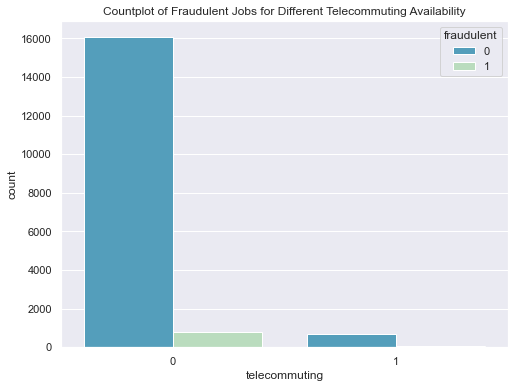

In [51]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='telecommuting', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for Different Telecommuting Availability")
plt.show()

In [39]:
total = df_structured.groupby(['telecommuting'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['telecommuting'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

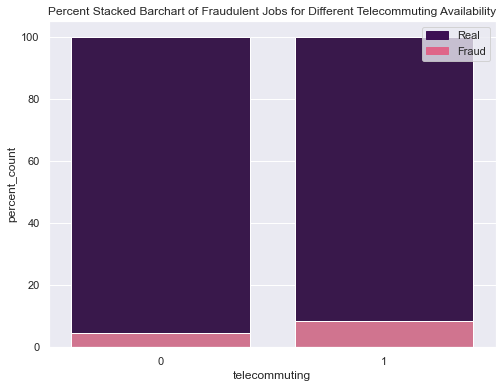

In [41]:
plt.figure(figsize=(8, 6))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="telecommuting",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="telecommuting", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for Different Telecommuting Availability")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

The plot illustrates that jobs that has telecommuting options available are more likely to be real jobs compared to jobs without telecommuting options. Unfortunately, the percentage of difference of fraud jobs between both telecommuting options are pretty small and make it difficult to differentiate real and fraud jobs properly. This means that this feature may not be as useful as we think.

### ii) Has Company Logo

In [42]:
df_structured['has_company_logo'].value_counts()

1    14011
0     3634
Name: has_company_logo, dtype: int64

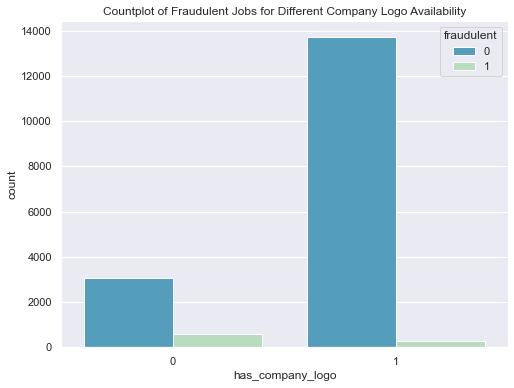

In [52]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='has_company_logo', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for Different Company Logo Availability")
plt.show()

In [44]:
total = df_structured.groupby(['has_company_logo'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['has_company_logo'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

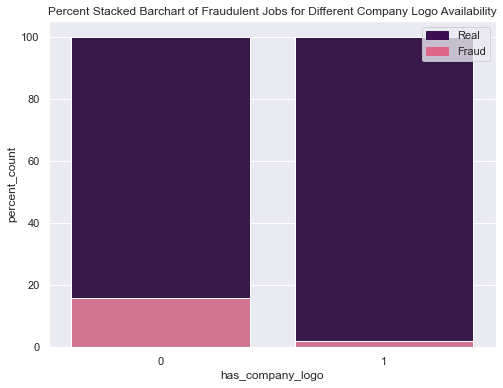

In [45]:
plt.figure(figsize=(8, 6))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="has_company_logo",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="has_company_logo", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for Different Company Logo Availability")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

The feature of whether a job has any company logo or not shows some useful differences from the plot above. It is expected to see that jobs with company logo shows much lower percentage of fraud jobs compared to jobs without any company logo. This is logic because normally fake jobs do not want to disclose their actual identity and prefer to stay under the radar. Thus, jobs without company logo are more likely to be fraud.

### iii) Has Questions

In [53]:
df_structured['has_questions'].value_counts()

0    8969
1    8676
Name: has_questions, dtype: int64

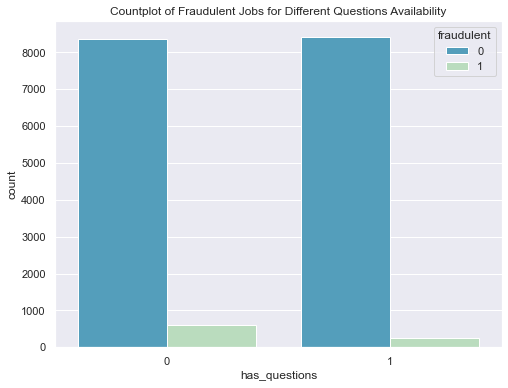

In [54]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='has_questions', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for Different Questions Availability")
plt.show()

In [56]:
total = df_structured.groupby(['has_questions'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['has_questions'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

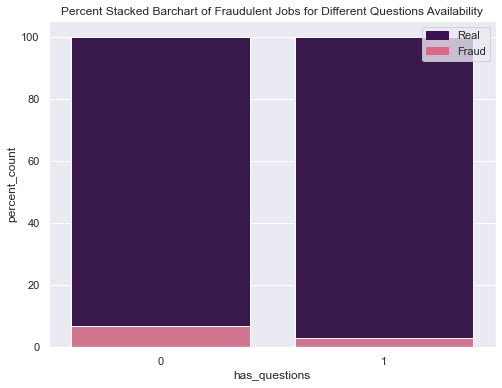

In [57]:
plt.figure(figsize=(8, 6))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="has_questions",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="has_questions", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for Different Questions Availability")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Despite the fact that jobs with has_questions of 0 (None) showing higher percentage of fraud jobs, the difference between the values of 0 and 1 seem to be very small and not that helpful in helping us determine if the job is fraud or actual. Overall, this feature is not offering any useful insights.

### iv) Employment Type

In [58]:
df_structured['employment_type'].value_counts()

Full-time                14484
Contract                  1616
Part-time                  820
Other                      252
Temporary                  237
Full-time & Part-time      236
Name: employment_type, dtype: int64

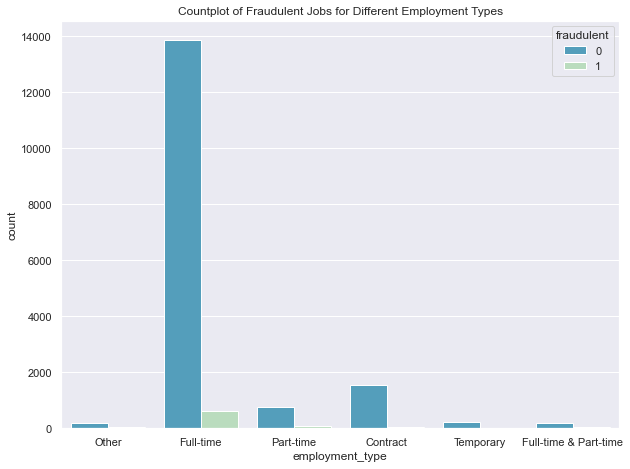

In [60]:
sns.set(font_scale=1)

plt.figure(figsize=(10, 7.5))
sns.countplot(x='employment_type', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for Different Employment Types")
plt.show()

In [61]:
total = df_structured.groupby(['employment_type'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['employment_type'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

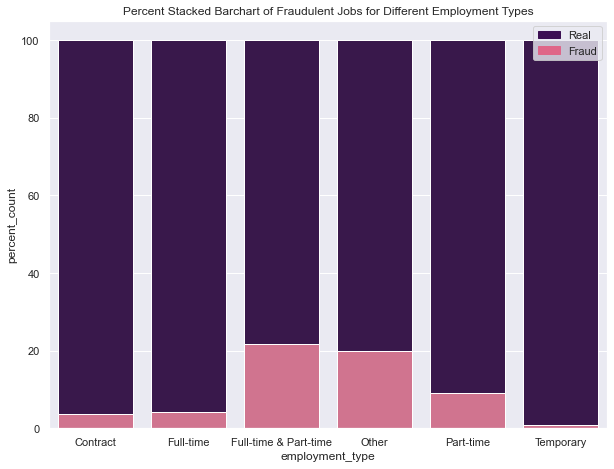

In [62]:
plt.figure(figsize=(10, 7.5))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="employment_type",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="employment_type", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for Different Employment Types")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Based on the stacked barchart above, 2 values from the employment type feature display significantly higher percentage of fraud job compared to the rest of the values, which are full time & part time, and other.  These 2 values show a percentage of slightly more than 20% of fraud jobs. The value that we created ourselves seem to be quite useful in giving us some extra insights after all. Therefore, jobs with the employment types of both full-time and part time together, as well as Other are more likely to be fraud.

### v) Required Experience

In [63]:
df_structured['required_experience'].value_counts()

Mid-Senior level    7863
Entry level         4004
Associate           3172
Not Applicable      1333
Internship           570
Director             534
Executive            169
Name: required_experience, dtype: int64

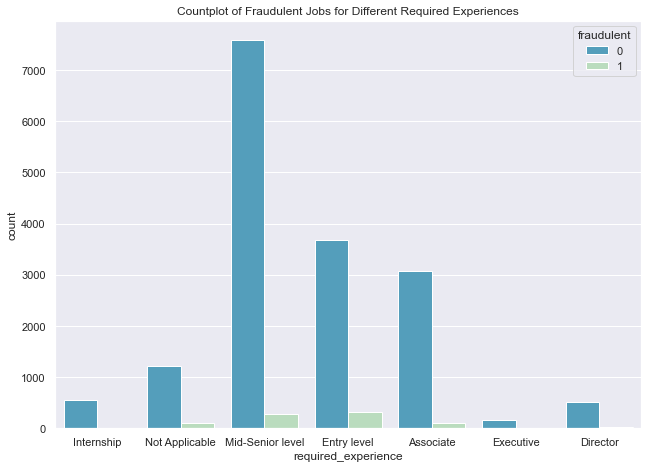

In [65]:
sns.set(font_scale=1)

plt.figure(figsize=(10.5, 7.5))
sns.countplot(x='required_experience', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for Different Required Experiences")
plt.show()

In [66]:
total = df_structured.groupby(['required_experience'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['required_experience'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

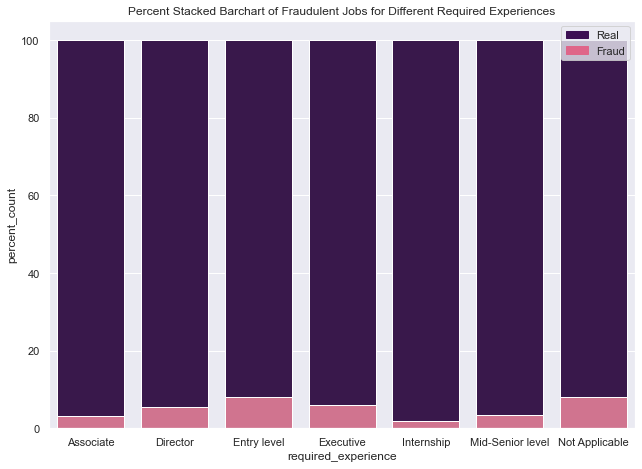

In [67]:
plt.figure(figsize=(10.5, 7.5))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="required_experience",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="required_experience", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for Different Required Experiences")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Apart from the experiences of Entry level and Not Applicable that see slightly higher percentage of fraud jobs, nothing interesting can be observed for the other 5 experiences. Overall, this feature is not very useful but no harm trying to use it later for Machine Learning.

### vi) Required Education

In [68]:
df_structured['required_education'].value_counts()

Bachelor's Degree                    7561
Unspecified                          5197
High School or equivalent            2249
Empty requirements                   1363
Master's Degree                       442
Associate Degree                      306
Certification                         206
Some College Coursework Completed     100
Professional                           73
Doctorate                              59
Vocational                             47
Some High School Coursework            27
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

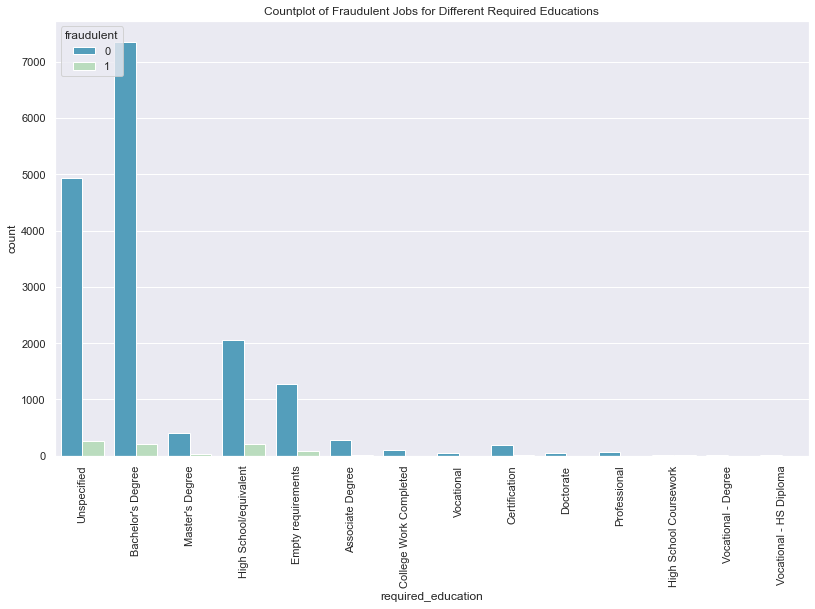

In [75]:
sns.set(font_scale=1)

plt.figure(figsize=(13.5, 8))
sns.countplot(x='required_education', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for Different Required Educations")
plt.xticks(ticks=list(range(14)), labels=['Unspecified', "Bachelor's Degree", "Master's Degree", "High School/equivalent", 
                                         "Empty requirements", "Associate Degree", "College Work Completed", 
                                         "Vocational", "Certification", "Doctorate", "Professional", 
                                         "High School Coursework", "Vocational - Degree", "Vocational - HS Diploma"], 
                      rotation=90)
plt.show()

In [76]:
total = df_structured.groupby(['required_education'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['required_education'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

In [80]:
list(total['required_education'])

['Associate Degree',
 "Bachelor's Degree",
 'Certification',
 'Doctorate',
 'Empty requirements',
 'High School or equivalent',
 "Master's Degree",
 'Professional',
 'Some College Coursework Completed',
 'Some High School Coursework',
 'Unspecified',
 'Vocational',
 'Vocational - Degree',
 'Vocational - HS Diploma']

In [87]:
fraud

,required_education,fraudulent,percent_count
0,Associate Degree,19,6.209150
1,Bachelor's Degree,204,2.698056
2,Certification,19,9.223301
3,Doctorate,2,3.389831
4,Empty requirements,84,6.162876
5,High School or equivalent,200,8.892841
6,Master's Degree,34,7.692308
7,Professional,4,5.479452
8,Some College Coursework Completed,3,3.000000
9,Some High School Coursework,20,74.074074


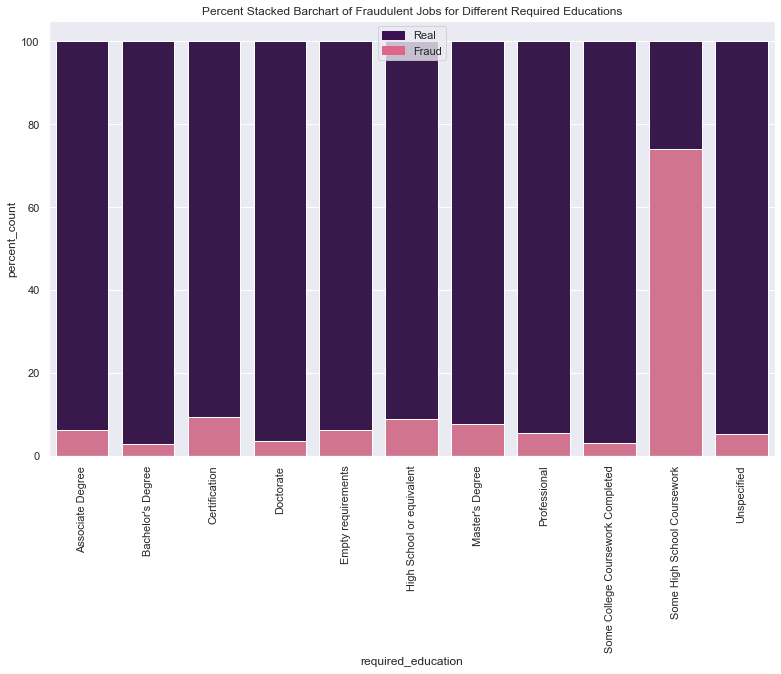

In [88]:
plt.figure(figsize=(13, 8))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="required_education",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="required_education", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for Different Required Educations")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=90)

# show the graph
plt.show()

For this plot, there is a very interesting observation that can be seen clearly. As expected, the value of Some High School Coursework exhibits very high percentage of fraud jobs, while the rest of the education requirements are showing similar distribution of around less than 10% fraud counts. This gives some importance to the feature that we can definitely consider using it later. Clearly, jobs with only Some High School Coursework requirements for education are more likely to be fake jobs.

### vii) Function

In [89]:
df_structured['function'].value_counts()

Information Technology    2649
Engineering               2031
Sales                     1917
Management                1446
Customer Service          1392
Administrative             968
Marketing                  951
Other                      941
Education                  859
Health Care Provider       560
Design                     511
Production                 294
Human Resources            276
Accounting/Auditing        263
Consulting                 262
Writing/Editing            244
Business Development       237
Finance                    229
Project Management         196
Art/Creative               167
Quality Assurance          149
Data Analyst               117
Product Management         114
Business Analyst           107
Advertising                 94
General Business            89
Public Relations            84
Manufacturing               83
Supply Chain                72
Research                    65
Legal                       56
Training                    55
Distribu

In [95]:
df_structured[df_structured['fraudulent'] == 1]['function'].value_counts()

Administrative            208
Engineering               131
Customer Service          104
Other                      85
Sales                      56
Information Technology     53
Management                 40
Accounting/Auditing        31
Health Care Provider       27
Finance                    17
Business Development       14
Marketing                  13
General Business           12
Human Resources            11
Project Management         10
Consulting                  8
Financial Analyst           6
Design                      6
Advertising                 5
Data Analyst                4
Manufacturing               4
Distribution                3
Writing/Editing             2
Education                   2
Art/Creative                2
Business Analyst            1
Production                  1
Strategy/Planning           1
Public Relations            1
Name: function, dtype: int64

In [101]:
functions = ['Information Technology', 'Engineering', 'Sales', 'Management', 'Customer Service', 'Administrative', 
             'Marketing', 'Other', 'Education', 'Health Care Provider', 'Design', 'Production', 'Human Resources', 
             'Accounting/Auditing', 'Consulting']

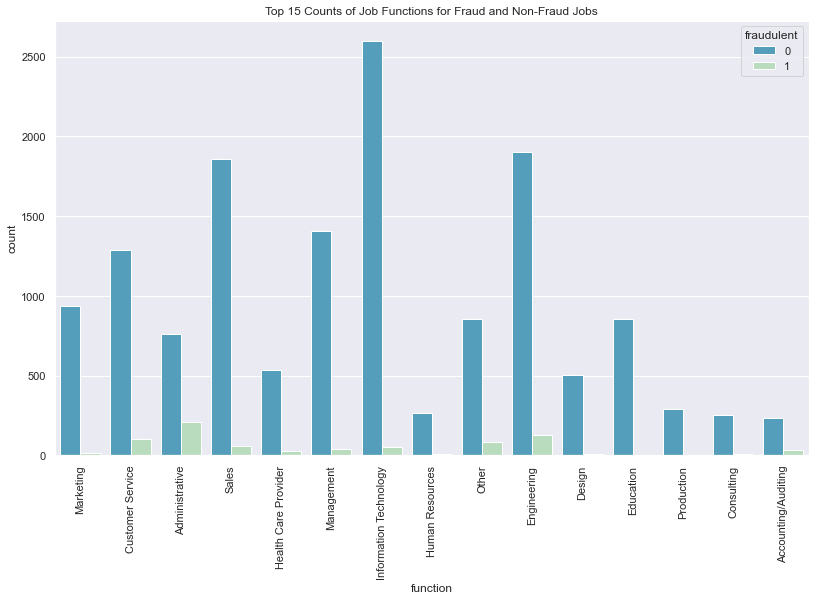

In [102]:
sns.set(font_scale=1)

# This is for total counts regardless of fraudulent or not
plt.figure(figsize=(13.5, 8))
sns.countplot(x='function', hue='fraudulent', data=df_structured[df_structured['function'].isin(functions)], palette='GnBu_r')
plt.title("Top 15 Counts of Job Functions for Fraud and Non-Fraud Jobs")
plt.xticks(rotation=90)
plt.show()

We'll plot the top 15 functions with the most fraud jobs like previously.

In [96]:
# For most 15 fraud jobs only
fraud_func = ['Administrative', 'Engineering', 'Customer Service', 'Other', 'Sales', 'Information Technology', 
              'Management', 'Accounting/Auditing', 'Health Care Provider', 'Finance', 'Business Development', 
              'Marketing', 'General Business', 'Human Resources', 'Project Management']

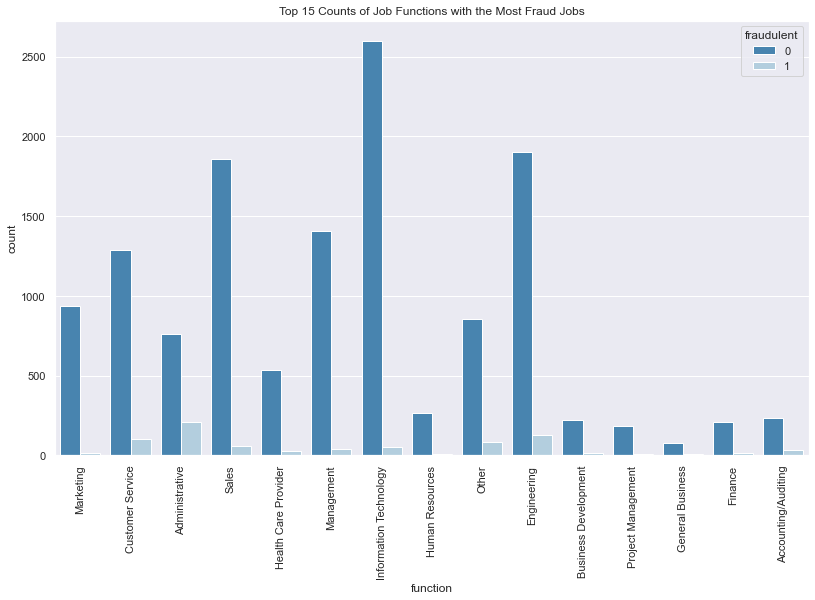

In [98]:
sns.set(font_scale=1)

plt.figure(figsize=(13.5, 8))
sns.countplot(x='function', hue='fraudulent', data=df_structured[df_structured['function'].isin(fraud_func)], palette='Blues_r')
plt.title("Top 15 Counts of Job Functions with the Most Fraud Jobs")
plt.xticks(rotation=90)
plt.show()

In [99]:
total = df_structured[df_structured['function'].isin(fraud_func)].groupby(['function'])['fraudulent'].count().reset_index()
fraud = df_structured[(df_structured['function'].isin(fraud_func)) & \
                      (df_structured['fraudulent'] == 1)].groupby(['function'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

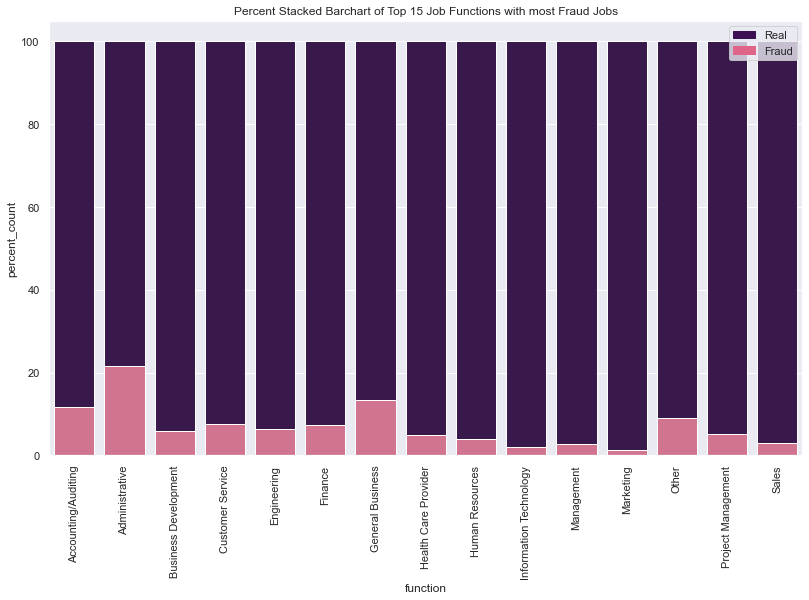

In [100]:
plt.figure(figsize=(13.5, 8))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="function",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="function", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Top 15 Job Functions with most Fraud Jobs")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=90)

# show the graph
plt.show()

From the looks of it, most of the job functions are showing similar fraud job distribution in terms of percentage, but we still see some functions that give out higher percentages, like Administrative and General Business. Some of the expected least fraud job percentages can be observed for functions of Marketing, Information Technology and Management. Thus, Administrative and General Business jobs are showing higher likelihood to be fraud jobs.

### viii) In Balanced Dataset

In [103]:
df_structured['in_balanced_dataset'].value_counts()

0    16751
1      894
Name: in_balanced_dataset, dtype: int64

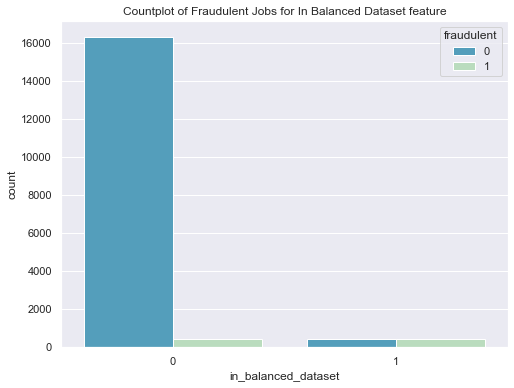

In [104]:
sns.set(font_scale=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='in_balanced_dataset', hue='fraudulent', data=df_structured, palette='GnBu_r')
plt.title("Countplot of Fraudulent Jobs for In Balanced Dataset feature")
plt.show()

In [105]:
total = df_structured.groupby(['in_balanced_dataset'])['fraudulent'].count().reset_index()
fraud = df_structured[df_structured['fraudulent'] == 1].groupby(['in_balanced_dataset'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

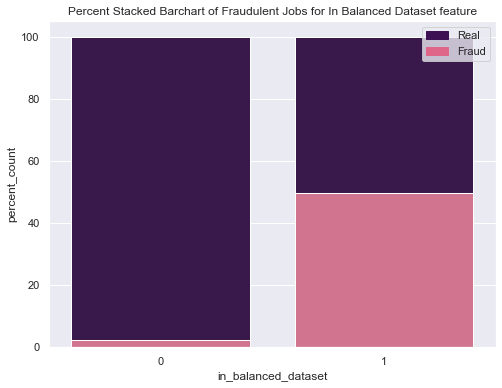

In [106]:
plt.figure(figsize=(8, 6))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="in_balanced_dataset",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="in_balanced_dataset", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Fraudulent Jobs for In Balanced Dataset feature")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Although the meaning of this balanced dataset feature is quite unclear, but the signals generated from the above plot is quite interesting. We see that although observations with in balanced dataset value of 1 is very less, it gives a fraud job percentage of around 50% compared to the value of 0 with less than 10% of fraud jobs. This could be an important feature to be kept later.

### viv) Country

In [108]:
df_structured['country'].value_counts().head(30)

US           10524
GB            2349
GR             939
CA             450
DE             390
NZ             330
IN             274
AU             213
Undefined      211
PH             132
NL             126
BE             117
IE             112
SG              80
HK              77
PL              76
Non-US          75
IL              72
EE              71
FR              68
ES              66
AE              54
EG              50
SE              49
RO              46
DK              42
ZA              40
BR              36
IT              31
FI              29
Name: country, dtype: int64

In [109]:
df_structured[df_structured['fraudulent'] == 1]['country'].value_counts()  # Only show top 12

US           724
AU            39
GB            23
Undefined     15
MY            12
CA            12
QA             6
BH             5
IN             4
PL             3
Non-US         3
TW             2
EG             1
EE             1
SA             1
BR             1
AE             1
ZA             1
ES             1
PH             1
ID             1
PK             1
Name: country, dtype: int64

In [110]:
countries = list(df_structured['country'].value_counts().head(15).index)

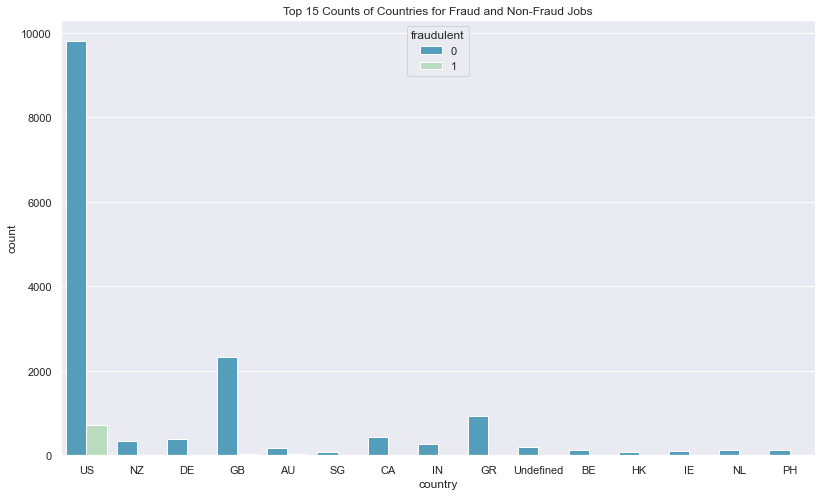

In [111]:
sns.set(font_scale=1)

# This is for total counts regardless of fraudulent or not
plt.figure(figsize=(13.5, 8))
sns.countplot(x='country', hue='fraudulent', data=df_structured[df_structured['country'].isin(countries)], palette='GnBu_r')
plt.title("Top 15 Counts of Countries for Fraud and Non-Fraud Jobs")
plt.show()

In [112]:
# For top fraud jobs only
fraud_countries = list(df_structured[df_structured['fraudulent'] == 1]['country'].value_counts().head(12).index)

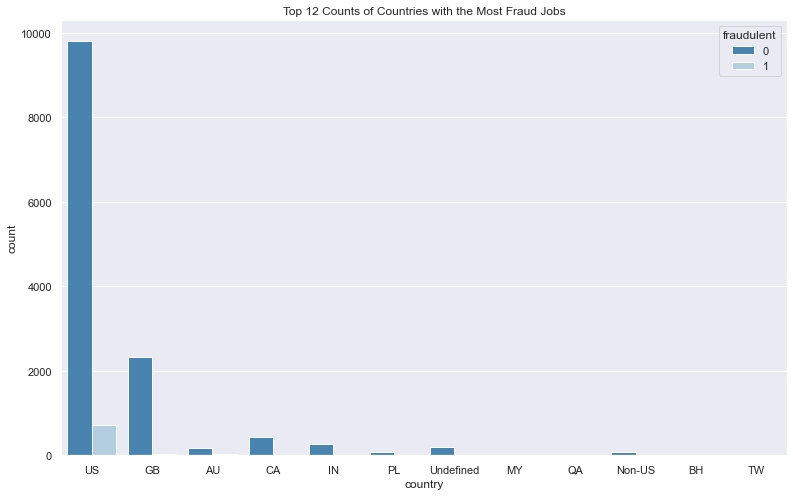

In [115]:
sns.set(font_scale=1)

plt.figure(figsize=(13, 8))
sns.countplot(x='country', hue='fraudulent', data=df_structured[df_structured['country'].isin(fraud_countries)], 
              palette='Blues_r')
plt.title("Top 12 Counts of Countries with the Most Fraud Jobs")
plt.show()

In [116]:
total = df_structured[df_structured['country'].isin(fraud_countries)].groupby(['country'])['fraudulent'].count().reset_index()
fraud = df_structured[(df_structured['country'].isin(fraud_countries)) & \
                      (df_structured['fraudulent'] == 1)].groupby(['country'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

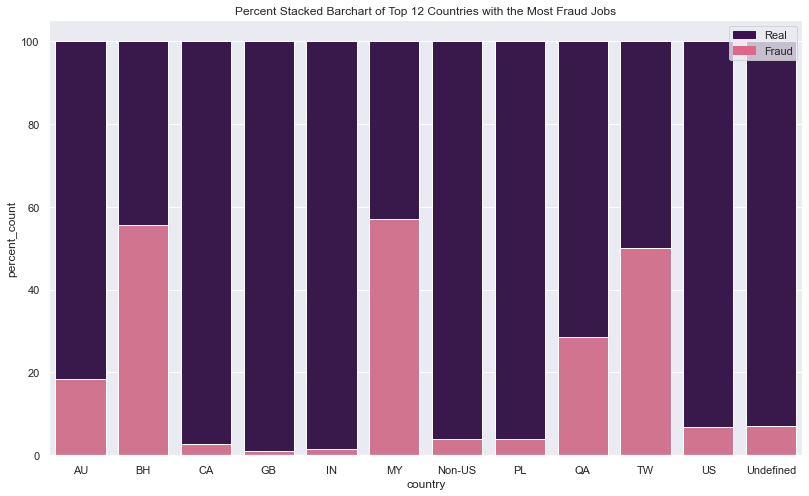

In [118]:
plt.figure(figsize=(13.5, 8))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="country",  y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="country", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Top 12 Countries with the Most Fraud Jobs")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In terms of percentage, the difference in frauds between countries can be seen clearly. We observed that countries like BH (Bahrain) and MY (Malaysia) shows very high percentages of fraud job counts compared to some countries like GB (Britain) and IN (India). The insights can be understood much easier than just purely plotting countplots.

### Extra: State

In [120]:
df[df['state'] != '']['state'].value_counts().head(30)

CA           2042
NY           1264
LND          1202
TX            970
I             753
IL            417
FL            413
OH            368
VA            330
MA            321
PA            316
N             298
BE            285
MI            278
DC            275
GA            233
ON            233
NC            224
Undefined     211
NJ            195
OR            190
MN            181
WA            176
MO            156
AZ            156
WI            152
CO            134
TN            132
CT            125
IN            119
Name: state, dtype: int64

In [128]:
df_state = df.copy()
df_state['country, state'] = df_state['country'] + ', ' + df_state['state']
df_state.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,state,"country, state"
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,NY,"US, NY"
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,N,"NZ, N"
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,IA,"US, IA"
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,DC,"US, DC"
4,Bill Review Manager,"US, FL, Fort Worth",<p>SpotSource Solutions LLC is a Global Human Capital Management Consulting firm headquartered i...,"<p><b>JOB TITLE:</b> Itemization Review Manager</p>\r\n<p><b>LOCATION:</b> Fort Worth, TX<b> ...",<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>RN license in the State of Texas</li>\r\n<li>Diplom...,<p>Full Benefits Offered</p>,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US,FL,"US, FL"


In [130]:
df_state['country, state'].value_counts().head(30)

US, CA                  2042
US, NY                  1264
GB, LND                 1202
US, TX                   970
GR, I                    747
US,                      428
US, IL                   417
US, FL                   413
US, OH                   368
US, VA                   330
US, PA                   316
US, MA                   313
NZ, N                    298
DE, BE                   285
US, MI                   277
US, DC                   275
US, GA                   233
CA, ON                   233
US, NC                   224
GB,                      216
Undefined, Undefined     211
US, NJ                   195
US, OR                   189
US, MN                   177
US, WA                   170
US, MO                   156
US, WI                   152
US, AZ                   150
US, CO                   134
US, IN                   119
Name: country, state, dtype: int64

In [134]:
df_state[df_state['fraudulent'] == 1]['country, state'].value_counts().head(30)

US, TX                  151
US, CA                  147
US, NY                   68
US, MD                   35
US,                      33
AU, NSW                  31
US, FL                   30
US, GA                   20
US, IL                   19
US, OH                   18
US, NC                   17
Undefined, Undefined     15
US, WA                   13
US, PA                   13
US, KY                   12
US, NV                   11
US, MI                   11
US, MA                    9
US, IN                    9
US, AL                    7
CA, ON                    7
MY,                       7
US, VA                    7
GB, LND                   7
US, DC                    7
US, MO                    6
US, KS                    6
US, CO                    6
US, NJ                    6
US, SC                    5
Name: country, state, dtype: int64

In [131]:
country_state = list(df_state['country, state'].value_counts().head(15).index)

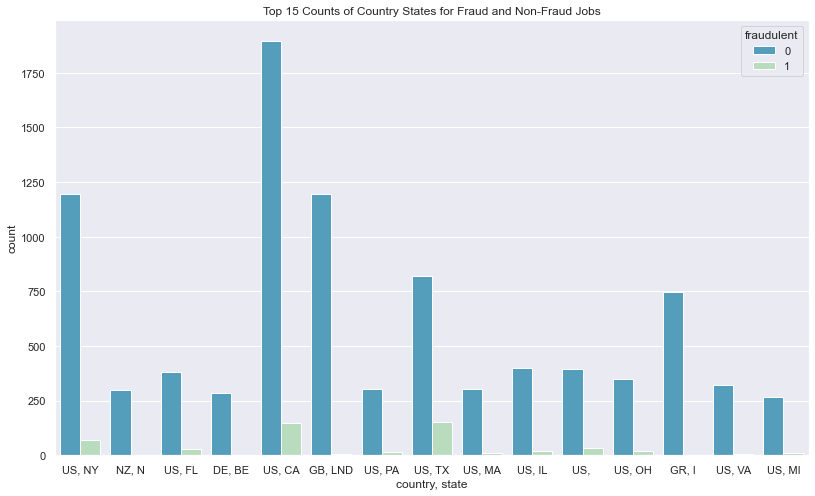

In [133]:
sns.set(font_scale=1)

# This is for total counts regardless of fraudulent or not
plt.figure(figsize=(13.5, 8))
sns.countplot(x='country, state', hue='fraudulent', data=df_state[df_state['country, state'].isin(country_state)], 
              palette='GnBu_r')
plt.title("Top 15 Counts of Country States for Fraud and Non-Fraud Jobs")
plt.show()

In [135]:
# For top fraud jobs only
fraud_countrystate = list(df_state[df_state['fraudulent'] == 1]['country, state'].value_counts().head(15).index)

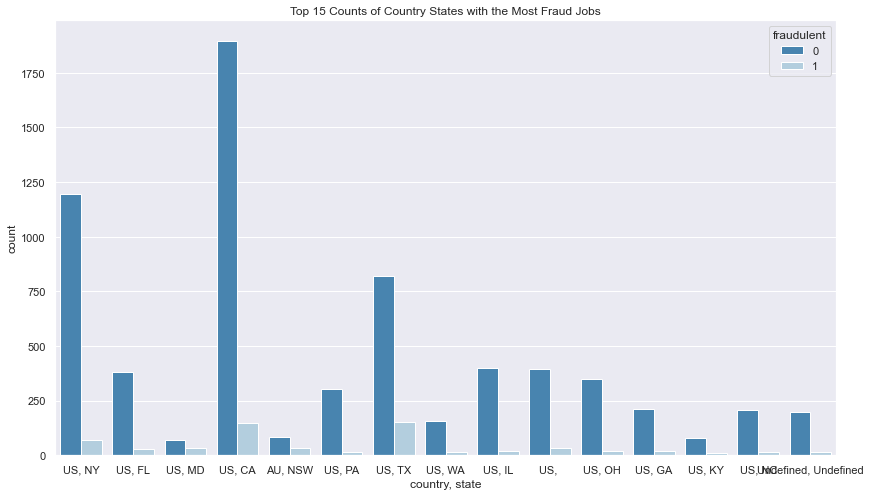

In [137]:
sns.set(font_scale=1)

# This is for total counts regardless of fraudulent or not
plt.figure(figsize=(14, 8))
sns.countplot(x='country, state', hue='fraudulent', data=df_state[df_state['country, state'].isin(fraud_countrystate)], 
              palette='Blues_r')
plt.title("Top 15 Counts of Country States with the Most Fraud Jobs")
plt.show()

In [139]:
total = df_state[df_state['country, state'].isin(fraud_countrystate)].groupby(['country, state'])['fraudulent'].count().reset_index()
fraud = df_state[(df_state['country, state'].isin(fraud_countrystate)) & \
                 (df_state['fraudulent'] == 1)].groupby(['country, state'])['fraudulent'].count().reset_index()

total['percent_count'] = [i / j * 100 for i, j in zip(total['fraudulent'], total['fraudulent'])]
fraud['percent_count'] = [i / j * 100 for i, j in zip(fraud['fraudulent'], total['fraudulent'])]

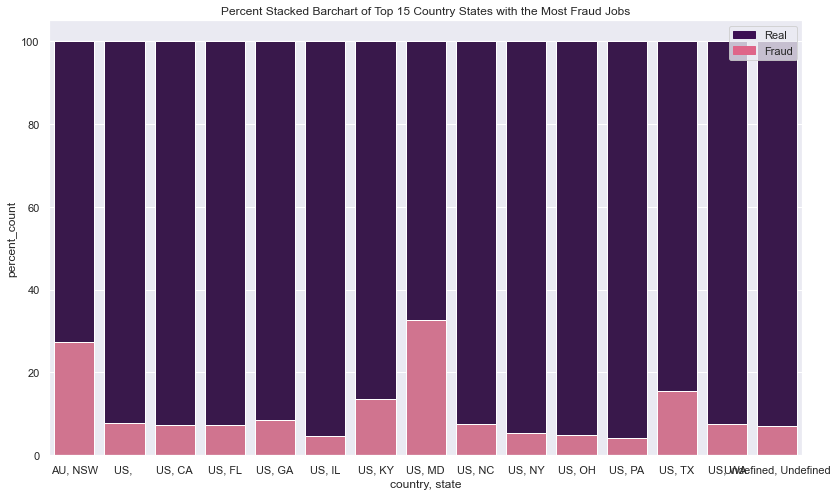

In [140]:
plt.figure(figsize=(13.5, 8))

# bar chart 1 -> top bars (group of actual '0')
bar1 = sns.barplot(x="country, state", y="percent_count", data=total, color='#3C1053FF')

# bar chart 2 -> bottom bars (group of frauds '1')
bar2 = sns.barplot(x="country, state", y="percent_count", data=fraud, color='#DF6589FF')

# add title
plt.title("Percent Stacked Barchart of Top 15 Country States with the Most Fraud Jobs")

# add legend
top_bar = mpatches.Patch(color='#3C1053FF', label='Real')
bottom_bar = mpatches.Patch(color='#DF6589FF', label='Fraud')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

It seems like there are some slight signals if the feature of states are included which can help differentiate the United State jobs better than just using country alone, which are observed for MD and TX. No matter what, the purpose of including states in EDA is just for us to better understand the feature itself and the insights that it gives us when combined with country, not for Machine Learning.

# EDA of Unstructured Data

Let's view our text data first and get the idea before we start the visualisation.

In [141]:
df_text.head(4)

,title,location,company_profile,description,requirements,benefits,text,clean_text,tokenized_text,lemmatized_text,fraudulent
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,,"Marketing Intern US, NY, New York <h3>We're Food52, and we've created a groundbreaking and award...",marketing intern us ny new york we are and we have created a groundbreaking and award winning co...,"[marketing, intern, us, ny, new, york, created, groundbreaking, award, winning, cooking, site, s...","[marketing, intern, u, ny, new, york, created, groundbreaking, award, winning, cooking, site, su...",0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,"Customer Service - Cloud Video Production NZ, , Auckland <h3>90 Seconds, the worlds Cloud Video ...",customer service cloud video production nz auckland seconds the worlds cloud video production se...,"[customer, service, cloud, video, production, nz, auckland, seconds, worlds, cloud, video, produ...","[customer, service, cloud, video, production, nz, auckland, second, world, cloud, video, product...",0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,,"Commissioning Machinery Assistant (CMA) US, IA, Wever <h3></h3>\r\n<p>Valor Services provides Wo...",commissioning machinery assistant cma us ia wever valor services provides workforce solutions th...,"[commissioning, machinery, assistant, cma, us, ia, wever, valor, services, provides, workforce, ...","[commissioning, machinery, assistant, cma, u, ia, wever, valor, service, provides, workforce, so...",0
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...","Account Executive - Washington DC US, DC, Washington <p>Our passion for improving quality of lif...",account executive washington dc us dc washington our passion for improving quality of life throu...,"[account, executive, washington, dc, us, dc, washington, passion, improving, quality, life, geog...","[account, executive, washington, dc, u, dc, washington, passion, improving, quality, life, geogr...",0


In [143]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Word Cloud

Word cloud is a convenient advanced visualisation that can be used to display words for textual data. It is not extremely intuitive but allows us to glance through the image and obtain the idea on the set of words that appear frequently based on the size of the words.

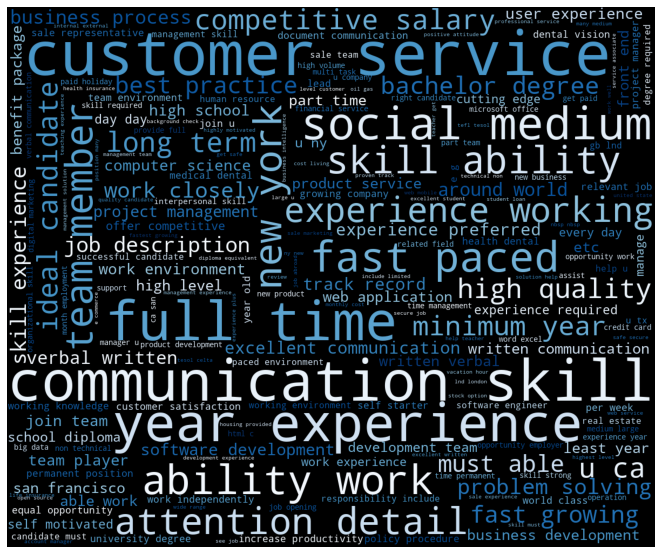

In [147]:
wordcloud = WordCloud(width=1200, height=1000, colormap="Blues", 
                      stopwords = set(stopwords.words('english'))).generate(
    " ".join(df_text['lemmatized_text'].apply(lambda x: " ".join(x))))

# Plot the wordcloud image
plt.figure(figsize = (9.5, 7.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Now, let's just focus on fraud jobs and non-fraud jobs separately to see the signals produced.

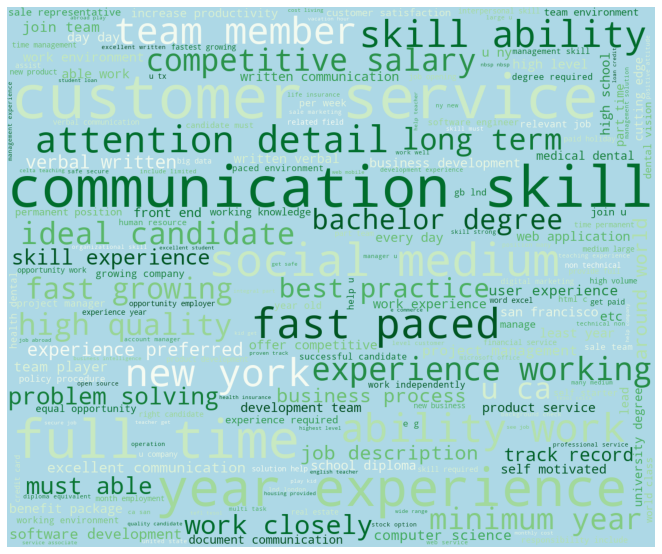

In [151]:
wordcloud_real = WordCloud(width=1200, height=1000, colormap="Greens", background_color="lightblue", 
                      stopwords = set(stopwords.words('english'))).generate(
    " ".join(df_text[df_text['fraudulent'] == 0]['lemmatized_text'].apply(lambda x: " ".join(x))))

# Plot the wordcloud image
plt.figure(figsize = (9.5, 7.5), facecolor = None)
plt.imshow(wordcloud_real)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

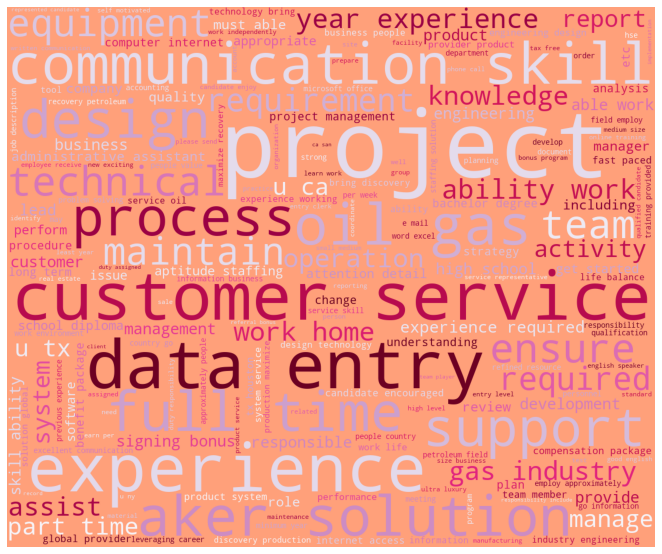

In [156]:
wordcloud_fraud = WordCloud(width=1200, height=1000, colormap="PuRd", background_color="lightsalmon",
                      stopwords = set(stopwords.words('english'))).generate(
    " ".join(df_text[df_text['fraudulent'] == 1]['lemmatized_text'].apply(lambda x: " ".join(x))))

# Plot the wordcloud image
plt.figure(figsize = (9.5, 7.5), facecolor = None)
plt.imshow(wordcloud_fraud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

These word cloud showed that for real jobs, we observe words appearing big such as customer, experience, service, year and skill. As for fraud jobs, words like project, customer, experience, solution, service, support and process also appear big in the word cloud. It is also observed that both real and fraud job texts share several word similarities in their respective word clouds which is expected.

## Horizontal Barplot

To see things clearer in the usual way, we'll adopt barplots to visualise the top words with the most counts for both fraud and non-fraud jobs. This will provide clearer view on the words compared to word cloud where everything is clamped together.

In [160]:
# Count the words for non-fraud jobs
word_list = " ".join(df_text[df_text['fraudulent'] == 0]['lemmatized_text'].apply(lambda x: " ".join(x))).split()

count_dict_real = {}
for word in list(set(word_list)):
    count_dict_real[word] = word_list.count(word)

In [161]:
# Count the words for fraud jobs
word_list = " ".join(df_text[df_text['fraudulent'] == 1]['lemmatized_text'].apply(lambda x: " ".join(x))).split()

count_dict_fraud = {}
for word in list(set(word_list)):
    count_dict_fraud[word] = word_list.count(word)

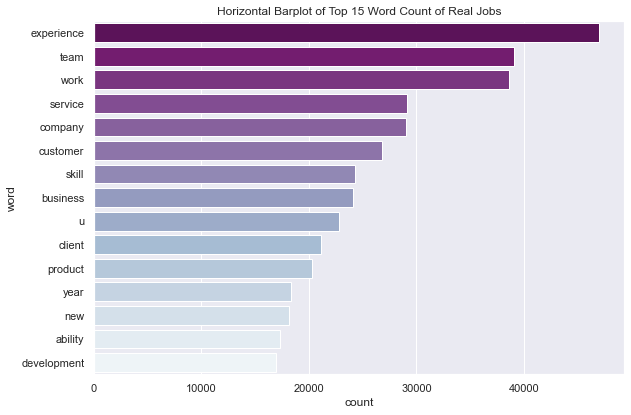

In [164]:
# Convert the dict to df for real jobs
word_count = pd.Series(index=count_dict_real.keys(), data=count_dict_real.values()).nlargest(15).reset_index().rename(columns={
    'index': "word", 0: "count"
})

# Plot the graph
plt.figure(figsize=(9.5, 6.5))
sns.barplot(x='count', y='word', data=word_count, palette='BuPu_r')
plt.title("Horizontal Barplot of Top 15 Word Count of Real Jobs")
plt.show()

Based on the plot, we see that words like experience, team, work, service and company are some of the words that appeared the most for non-fraud jobs. From the looks of it, this is quite reasonable as recruiters will want information like years of experience requirements and what type of service the job is involved in to be advertised to potential candidates.

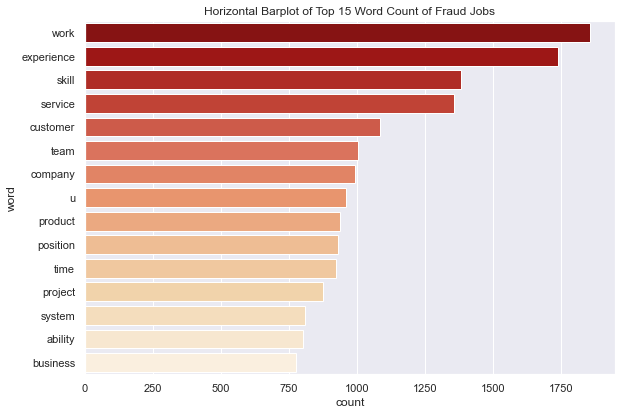

In [166]:
# Convert the dict to df for fraud jobs
word_count = pd.Series(index=count_dict_fraud.keys(), data=count_dict_fraud.values()).nlargest(15).reset_index().rename(columns={
    'index': "word", 0: "count"
})

# Plot the graph
plt.figure(figsize=(9.5, 6.5))
sns.barplot(x='count', y='word', data=word_count, palette='OrRd_r')
plt.title("Horizontal Barplot of Top 15 Word Count of Fraud Jobs")
plt.show()

Compared to non-fraud jobs, the word count of the top words seemed to be significantly less than those words from non-fraud jobs. It is also noted that some of the words that appeared in non-fraud jobs also appeared frequently here such as experience, service and customer. However, some differences can be noted like for example, non-fraud jobs contain frequent words like client and year, but fraud jobs contain new words like time and system.

# Feature Engineering

Perhaps, we can try to feature engineer the total word count and do some simple visualisation

In [167]:
df_structured.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country
0,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US
1,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ
2,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US


In [172]:
len(df_text.loc[0, 'text']), len(df_text.loc[0, 'text'].split())

(2944, 410)

In [173]:
df.shape, df_text.shape

((17645, 17), (17645, 11))

In [174]:
df2 = df.copy()
df2['raw_word_count'] = df_text['text'].apply(lambda x: len(x.split()))
df2.head(4)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,state,raw_word_count
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support,...","<p>Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and...",<ul>\r\n<li>Experience with content management systems a major plus (any blogging counts!)</li>\...,,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,NY,410
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Production Service.</h3>\r\n<p>90 Seconds is the worlds C...",<p>Organised - Focused - Vibrant - Awesome!<br><br>Do you have a passion for customer service? S...,<p><b>What we expect from you:</b></p>\r\n<p>Your key responsibility will be to communicate with...,<h3><b>What you will get from us</b></h3>\r\n<p>Through being part of the 90 Seconds team you wi...,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,N,966
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workforce Solutions that meet the needs of companies acr...,"<p>Our client, located in Houston, is actively seeking an experienced Commissioning Machinery As...",<ul>\r\n<li>Implement pre-commissioning and commissioning procedures for rotary equipment.</li>\...,,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,IA,385
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life through geography is at the heart of everything we ...,<p><b>THE COMPANY: ESRI – Environmental Systems Research Institute</b></p>\r\n<p>Our passion for...,"<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s or Master’s in GIS, business administration, or a r...","<p>Our culture is anything but corporate—we have a collaborative, creative environment; phone di...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,DC,773


In [175]:
df2['raw_word_count'].describe()

count    17645.000000
mean       412.526608
std        289.639938
min          4.000000
25%        249.000000
50%        378.000000
75%        529.000000
max       7021.000000
Name: raw_word_count, dtype: float64

## Boxplot

To visualize relationship that involves a categorical and a numerical feature, boxplot is most suited to obtain insights from any possible differences in distribution between fraud and real jobs.

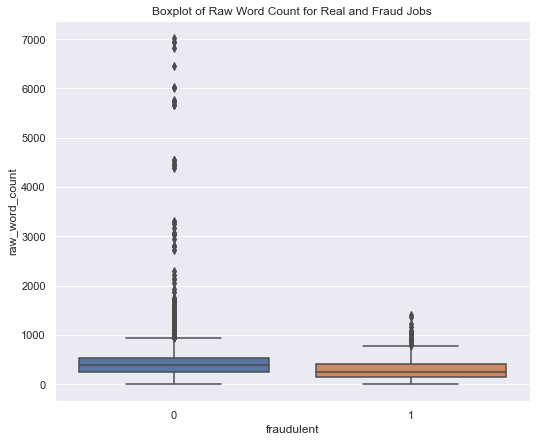

In [176]:
sns.set(font_scale=1)

plt.figure(figsize=(8.5, 7))
sns.boxplot(x='fraudulent', y='raw_word_count', data=df2)
plt.title("Boxplot of Raw Word Count for Real and Fraud Jobs")
plt.show()

As expected, although the central distributions seem to have little difference between fraud and non-fraud jobs, the outliers for non-fraud jobs are having pretty high word count compared to fraud jobs that have significantly low word count. In a way, this variable could be kind of useful.

# Feature Selection to Identify Significant Features

For this part, keep in mind that what we are focusing will only be categorical features. Since we are doing classification, there are 2 tests available for us which are chi-square test and mutual information test. Let's hope and assume that word count is not a very significant feature since we didn't feature engineer that variable.

## Prepare our new Structured Dataframe

In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17645 non-null  object
 1   location             17645 non-null  object
 2   company_profile      17645 non-null  object
 3   description          17645 non-null  object
 4   requirements         17645 non-null  object
 5   benefits             17645 non-null  object
 6   telecommuting        17645 non-null  int64 
 7   has_company_logo     17645 non-null  int64 
 8   has_questions        17645 non-null  int64 
 9   employment_type      17645 non-null  object
 10  required_experience  17645 non-null  object
 11  required_education   17645 non-null  object
 12  function             17645 non-null  object
 13  fraudulent           17645 non-null  int64 
 14  in_balanced_dataset  17645 non-null  int64 
 15  country              17645 non-null  object
 16  stat

In [181]:
df2.iloc[:, [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]]

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,raw_word_count
0,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,410
1,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,966
2,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,385
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,773
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US,519
...,...,...,...,...,...,...,...,...,...,...,...
17640,0,1,1,Full-time,Mid-Senior level,Unspecified,Sales,0,0,CA,909
17641,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting/Auditing,0,0,US,713
17642,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Engineering,0,0,US,419
17643,0,0,1,Contract,Not Applicable,Professional,Design,0,0,NG,203


In [184]:
# Metadata df, excluding state
df_structured = df2.copy()
df_structured = df_structured.iloc[:, [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]]
df_structured

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,raw_word_count
0,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,410
1,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,966
2,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,385
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,773
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US,519
...,...,...,...,...,...,...,...,...,...,...,...
17640,0,1,1,Full-time,Mid-Senior level,Unspecified,Sales,0,0,CA,909
17641,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting/Auditing,0,0,US,713
17642,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Engineering,0,0,US,419
17643,0,0,1,Contract,Not Applicable,Professional,Design,0,0,NG,203


## 1. Chi-Square Test

In [185]:
df_structured.drop(columns=['fraudulent', 'raw_word_count']).columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'function',
       'in_balanced_dataset', 'country'],
      dtype='object')

In [188]:
def chi_square_test(X_train, y_train, X_test):
    # configure to select features
    chi = SelectKBest(score_func=chi2, k='all')
    
    # learn relationship from training data
    chi.fit(X_train, y_train)
    
    # transform train input data
    X_train_chi = chi.transform(X_train)
    
    # transform test input data
    X_test_chi = chi.transform(X_test)
    
    return X_train_chi, X_test_chi, chi

In [200]:
columns = df_structured.drop(columns=['fraudulent', 'raw_word_count']).columns

# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(df_structured[columns], df_structured['fraudulent'], 
                                                    test_size=0.33, random_state=1)

# prepare input features
# unknown value is set to 90 because the X_train has 90 values for country (0-89)
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=90)
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare target variable
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Chi square test feature selection
X_train_chi, X_test_chi, chi = chi_square_test(X_train_enc, y_train_enc, X_test_enc)

# Scores of features
for i in range(len(chi.scores_)):
    print('%s: %f' % (columns[i], chi.scores_[i]))

telecommuting: 11.768925
has_company_logo: 171.241627
has_questions: 56.988274
employment_type: 29.212776
required_experience: 1.632307
required_education: 101.678779
function: 827.258587
in_balanced_dataset: 2678.065535
country: 1547.527076


In [201]:
list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(chi.pvalues_)))

['Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Fail to reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0',
 'Reject H0']

In [202]:
# Put them into a df
pd.DataFrame({'feature': columns, 'score': list(chi.scores_), 'p_value': list(chi.pvalues_), 
              'chi2_result': list(map(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0', list(chi.pvalues_)))})

,feature,score,p_value,chi2_result
0,telecommuting,11.768925,6.022777e-04,Reject H0
1,has_company_logo,171.241627,3.962674e-39,Reject H0
2,has_questions,56.988274,4.384181e-14,Reject H0
3,employment_type,29.212776,6.485019e-08,Reject H0
4,required_experience,1.632307,2.013842e-01,Fail to reject H0
5,required_education,101.678779,6.529614e-24,Reject H0
6,function,827.258587,6.392581e-182,Reject H0
7,in_balanced_dataset,2678.065535,0.000000e+00,Reject H0
8,country,1547.527076,0.000000e+00,Reject H0


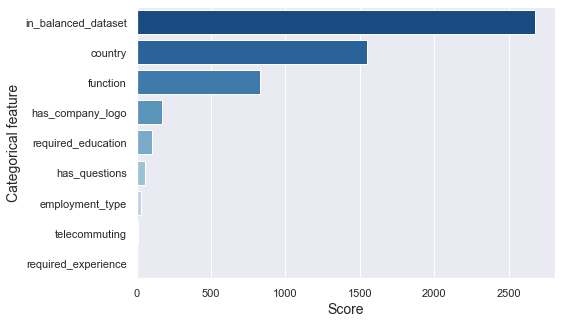

In [204]:
# plot the scores of features
dataset_chi = pd.DataFrame()
dataset_chi['feature'] = X_train.columns[range(len(chi.scores_))]
dataset_chi['scores'] = chi.scores_
dataset_chi = dataset_chi.sort_values(by='scores', ascending=False)

plt.figure(figsize=(7.5, 5))
sns.barplot(x=dataset_chi['scores'], y=dataset_chi['feature'], palette='Blues_r')
sns.set(font_scale=1)
plt.ylabel('Categorical feature', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.show()

## 2. Mutual Information

In [205]:
def mutual_info_test(X_train, y_train, X_test):
    # configure to select features
    mi = SelectKBest(score_func=mutual_info_classif, k='all')
    
    # learn relationship from training data
    mi.fit(X_train, y_train)
    
    # transform train input data
    X_train_mi = mi.transform(X_train)
    
    # transform test input data
    X_test_mi = mi.transform(X_test)
    
    return X_train_mi, X_test_mi, mi

In [206]:
columns = df_structured.drop(columns=['fraudulent', 'raw_word_count']).columns

# Perform the train test stratified split
X_train, X_test, y_train, y_test = train_test_split(df_structured[columns], df_structured['fraudulent'], 
                                                    test_size=0.33, random_state=1)

# prepare input features
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=90)
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

# prepare target variable
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# Chi square test feature selection
X_train_mi, X_test_mi, mi = mutual_info_test(X_train_enc, y_train_enc, X_test_enc)

# Scores of features
for i in range(len(mi.scores_)):
    print('%s: %f' % (columns[i], mi.scores_[i]))

telecommuting: 0.000000
has_company_logo: 0.027158
has_questions: 0.006499
employment_type: 0.006826
required_experience: 0.004587
required_education: 0.008910
function: 0.021290
in_balanced_dataset: 0.050331
country: 0.019962


In [207]:
# Put them into a df
pd.DataFrame({'feature': columns, 'score': list(mi.scores_)})

,feature,score
0,telecommuting,0.000000
1,has_company_logo,0.027158
2,has_questions,0.006499
3,employment_type,0.006826
4,required_experience,0.004587
5,required_education,0.008910
6,function,0.021290
7,in_balanced_dataset,0.050331
8,country,0.019962


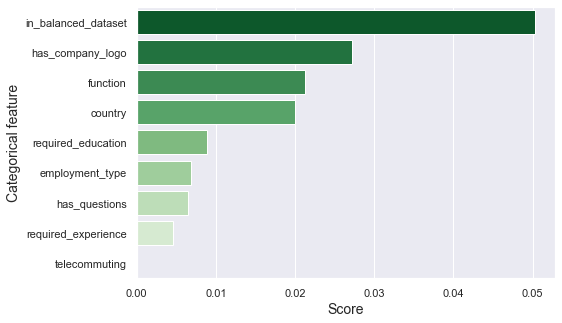

In [209]:
# plot the scores of features
dataset_mi = pd.DataFrame()
dataset_mi['feature'] = X_train.columns[range(len(mi.scores_))]
dataset_mi['scores'] = mi.scores_
dataset_mi = dataset_mi.sort_values(by='scores', ascending=False)

plt.figure(figsize=(7.5, 5))
sns.barplot(x=dataset_mi['scores'], y=dataset_mi['feature'], palette='Greens_r')
sns.set(font_scale=1)
plt.ylabel('Categorical feature', fontsize=14)
plt.xlabel('Score', fontsize=14)
plt.show()

**Which structured features have the strongest correlation or influence towards fraudulent target variable?**

Based on the results produced from the 2 statistical tests which are chi-square test and mutual information test, we found out that the variables that are significant are in_balanced dataset, has_company_logo, function, country, required_education, employment_type and has_questions. On the other hand, 2 features which are required_experience and telecommuting are not significant. The feature of required_experience produced the results that mentions failed to reject the null hypothesis which is the only variable to have such results, while telecommuting has 0 score in mutual information test. Due to these 2 findings, we conclude that these variables are not important for the prediction of fraudulent jobs.